In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [5]:
import pandas as pd
import numpy as np


In [6]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)


# test data

## unpooled 112 trials

In [12]:
inputfile = open('log/unpooled/unpooled_label')

In [13]:
df_fewtrials = pd.DataFrame(columns=['subj', 'acc', 'script','k'])

In [14]:
#for i in range(1471): inputfile.readline() # skip first 1470 lines

In [15]:
for i in range(3000):
    line = inputfile.readline()
    if 'unpooled_label.py' in line:
        if 'Subj num:' in line:
            strline = str(line)
            strline = strline[43:]
            subjnum = str(strline[:strline.find(' ')])
            if(int(subjnum)>9):
                strline = str(strline[strline.find(' ')+2:])
            else:
                strline = str(strline[strline.find(' ')+1:])
            strline = strline[strline.find(':')+2:]
            acc = float(strline[:strline.find(' ')])
            strline = str(strline[strline.find(' ')+1:])
            strline = strline[strline.find(':')+2:]
            script = str(strline[:strline.find(',')])
            strline = str(strline[strline.find(' ')+1:])
            strline = strline[strline.find('dims')+6:]
            k = int(strline[:2])
            newdict = {'subj':subjnum,'acc':acc,'script':script,'k':k}

            df_fewtrials = df_fewtrials.append(newdict,ignore_index=True)


In [16]:
df_fewtrials = df_fewtrials[:-3]
df_fewtrials

,subj,acc,script,k
0,2,0.464286,unpooled_label.py,1
1,4,0.500000,unpooled_label.py,1
2,10,0.428571,unpooled_label.py,1
3,41,0.464286,unpooled_label.py,1
4,43,0.607143,unpooled_label.py,1
...,...,...,...,...
80,51,0.500000,unpooled_label.py,5
81,52,0.464286,unpooled_label.py,5
82,53,0.428571,unpooled_label.py,5
83,54,0.428571,unpooled_label.py,5


In [17]:
subjects_fewtrials = df_fewtrials['subj']
assert len(subjects_fewtrials)/df_fewtrials['k'].max() == len(df_fewtrials['subj'].unique())

In [18]:
list_y_few=[]
list_x_few=[]
for i in list(df_fewtrials['k'].unique()):
    list_y_few.append(df_fewtrials[df_fewtrials['k']==i]['acc'].mean())
    list_x_few.append(df_fewtrials[df_fewtrials['k']==i]['k'].unique())

<function matplotlib.pyplot.show(close=None, block=None)>

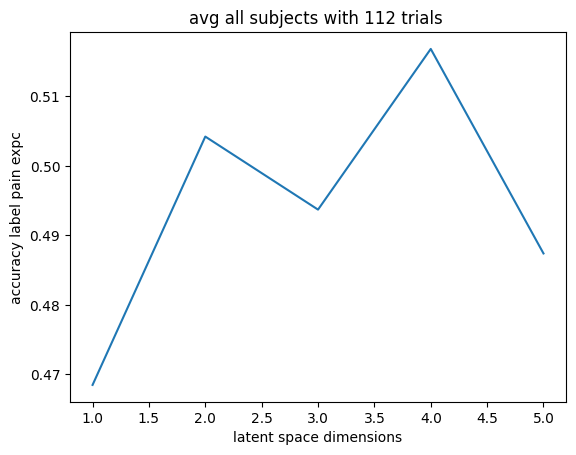

In [19]:
plt.plot(list_x_few,list_y_few)
plt.title('avg all subjects with 112 trials ')
plt.xlabel('latent space dimensions')
plt.ylabel('accuracy label pain expc')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

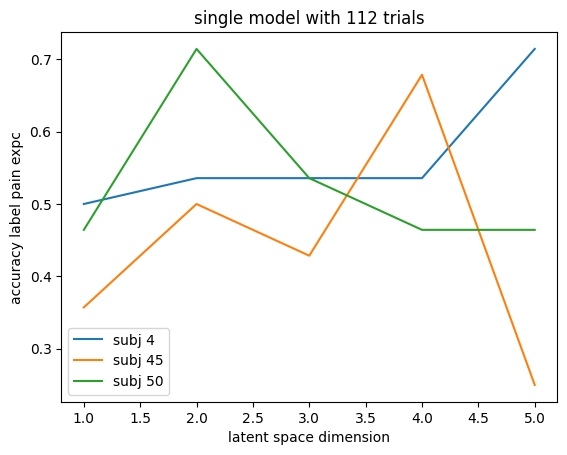

In [21]:
for i in list(['4','48','52']):
    y = df_fewtrials[df_fewtrials['subj']==i]['acc']
    x = df_fewtrials[df_fewtrials['subj']==i]['k']
    assert len(x)==len(y)
    plt.plot(x,y)
    plt.legend(['subj 4','subj 45','subj 50'])
    plt.xlabel('latent space dimension')
    plt.ylabel('accuracy label pain expc')
    plt.title('single model with 112 trials')

plt.show

# analyze posterior predictive

In [25]:
from xarray import open_dataset
import arviz as az
posterior = open_dataset('unpooled/k1_sub2_posterior.h5', engine='scipy')

/home/paolo/matteo/matteo/unimi/tesi_master/code/my_env/lib/python3.8/site-packages/arviz/plots/plot_utils.py:271: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (10713) in plot_posterior, generating only 40 plots
  warnings.warn(


array([[<AxesSubplot: title={'center': 'c\n0, 0'}>,
        <AxesSubplot: title={'center': 'c\n1, 0'}>,
        <AxesSubplot: title={'center': 'c\n2, 0'}>,
        <AxesSubplot: title={'center': 'c\n3, 0'}>],
       [<AxesSubplot: title={'center': 'c\n4, 0'}>,
        <AxesSubplot: title={'center': 'c\n5, 0'}>,
        <AxesSubplot: title={'center': 'c\n6, 0'}>,
        <AxesSubplot: title={'center': 'c\n7, 0'}>],
       [<AxesSubplot: title={'center': 'c\n8, 0'}>,
        <AxesSubplot: title={'center': 'c\n9, 0'}>,
        <AxesSubplot: title={'center': 'c\n10, 0'}>,
        <AxesSubplot: title={'center': 'c\n11, 0'}>],
       [<AxesSubplot: title={'center': 'c\n12, 0'}>,
        <AxesSubplot: title={'center': 'c\n13, 0'}>,
        <AxesSubplot: title={'center': 'c\n14, 0'}>,
        <AxesSubplot: title={'center': 'c\n15, 0'}>],
       [<AxesSubplot: title={'center': 'c\n16, 0'}>,
        <AxesSubplot: title={'center': 'c\n17, 0'}>,
        <AxesSubplot: title={'center': 'c\n18, 0'}>,

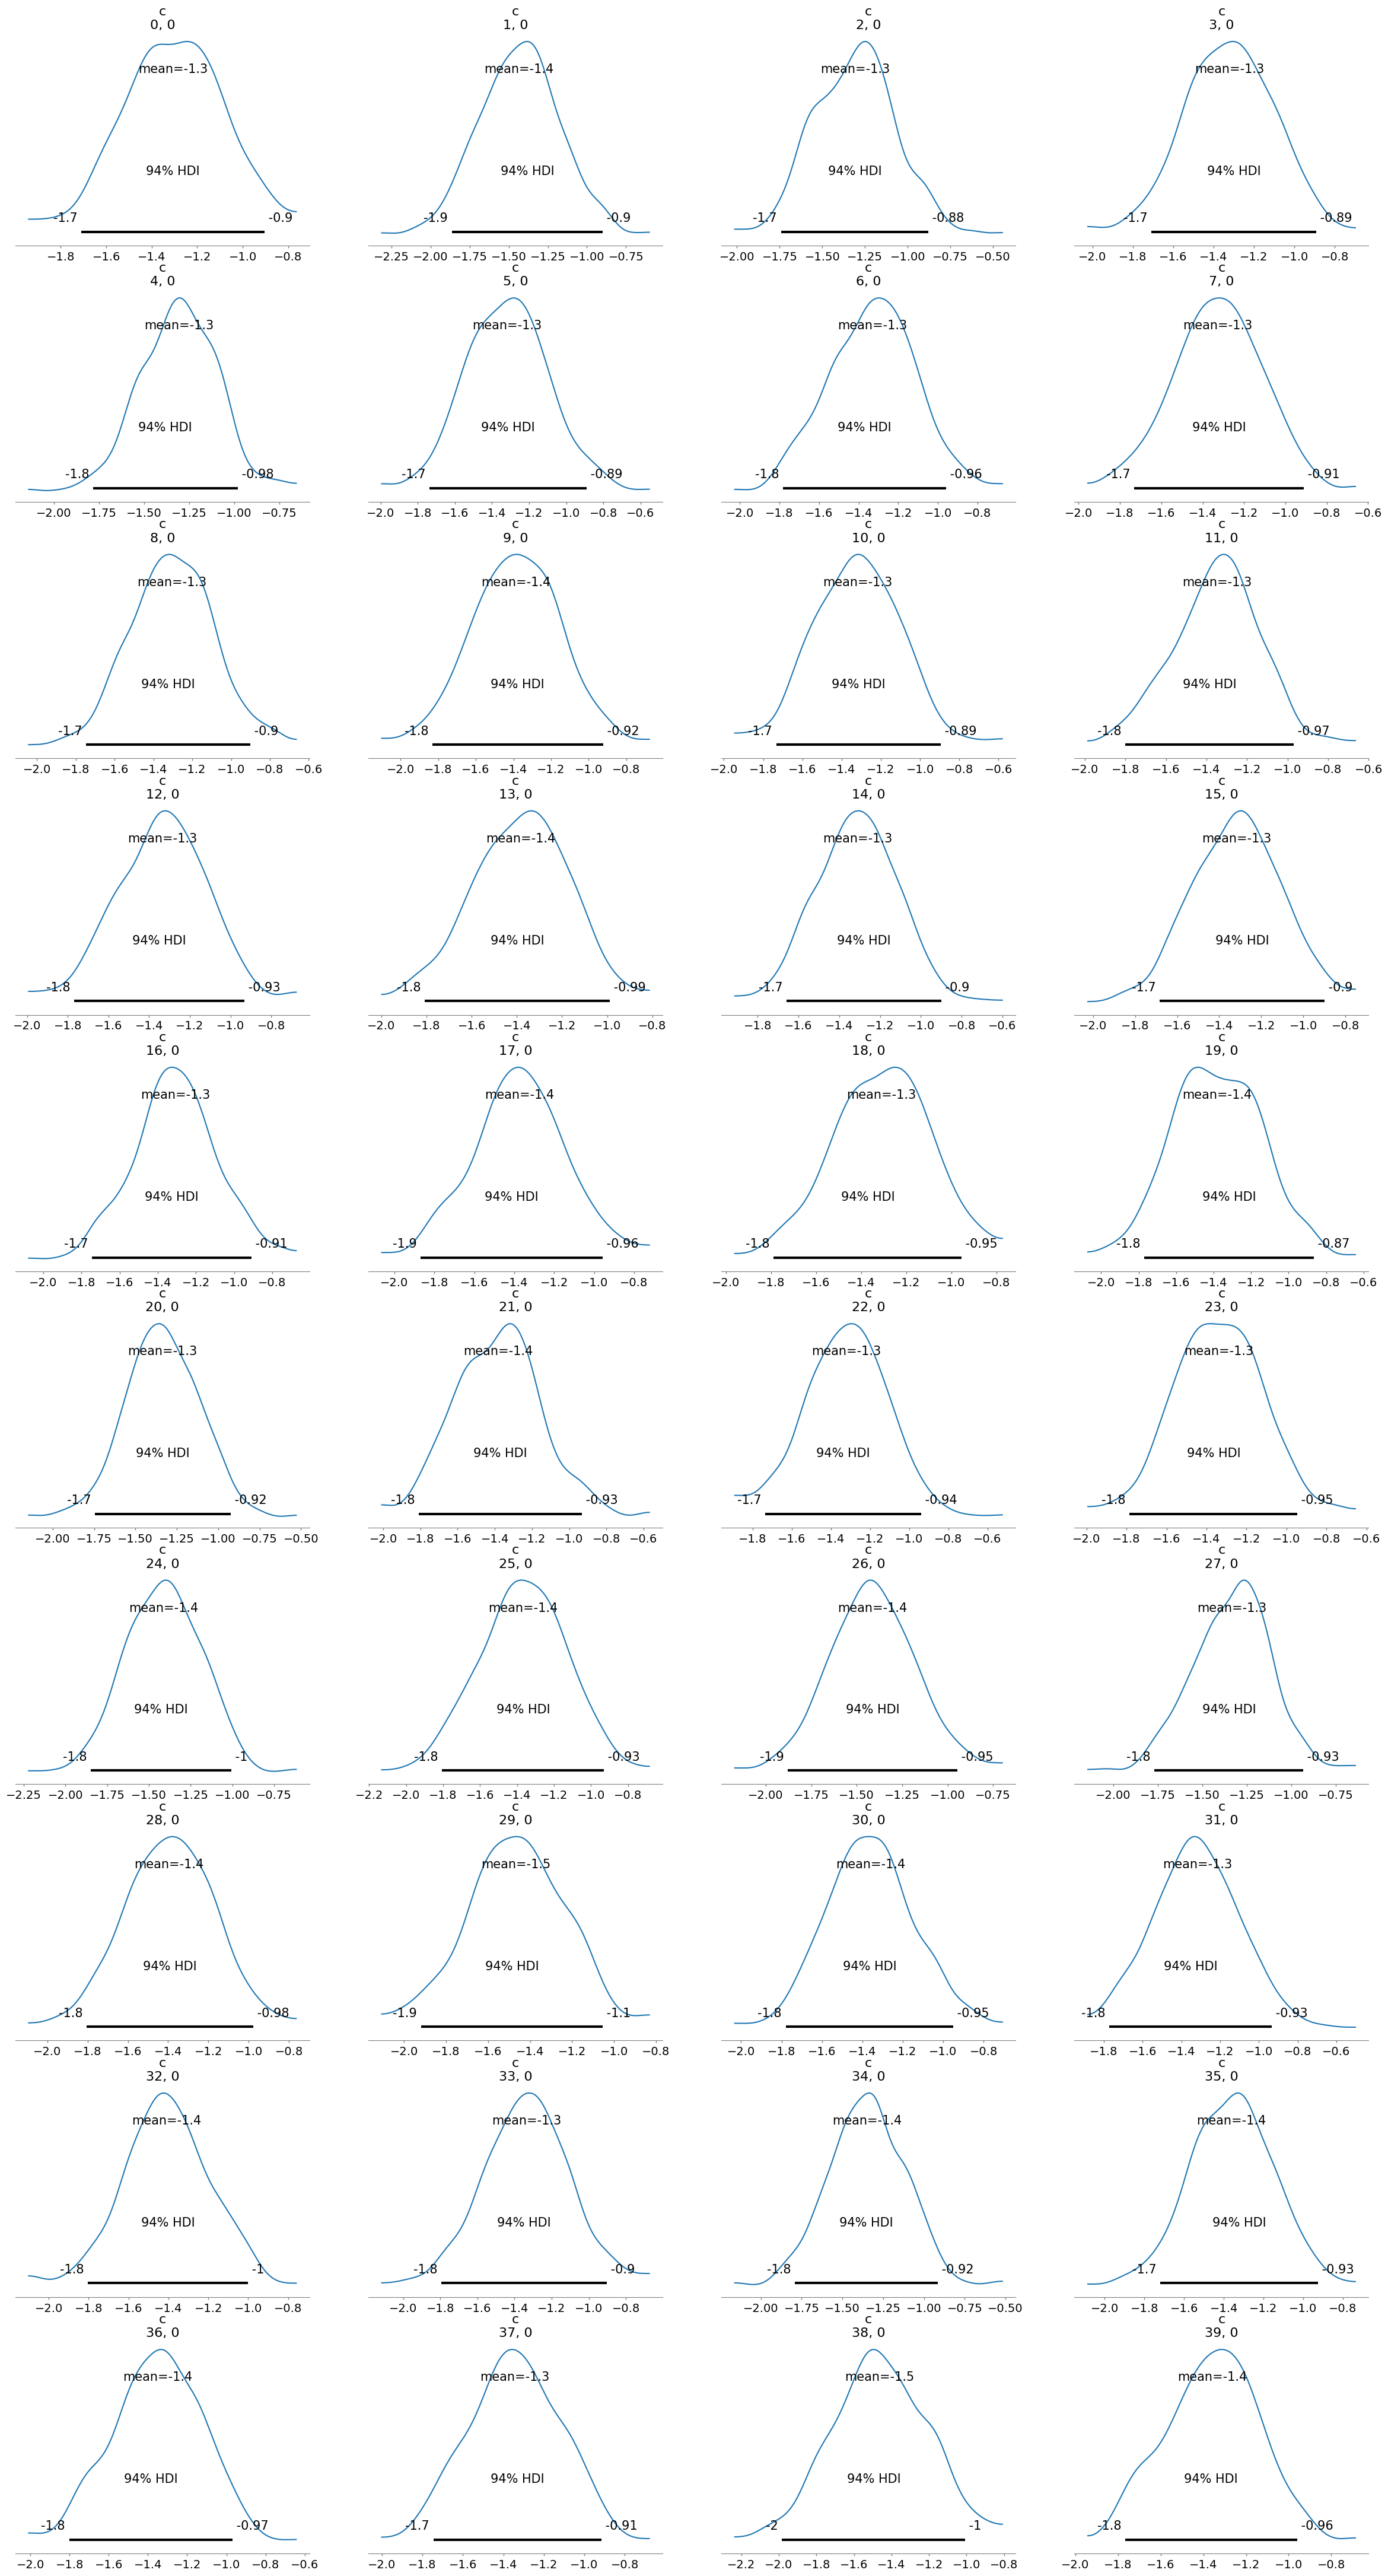

In [27]:
az.plot_posterior(posterior)

# single model 160 trials

In [91]:
inputfile = open('logfile')

In [92]:
df_48 = pd.DataFrame(columns=['subj', 'acc', 'script','k'])

In [93]:
#for i in range(1471): inputfile.readline() # skip first 1470 lines

In [94]:
for i in range(3000):

    line = inputfile.readline()

    if 'hierarchical_all_subjects.py' in line:
        if 'Subj num:' in line:
            strline = str(line)

            strline = strline[43:]
            subjnum = str(strline[:strline.find(' ')])
            if(int(subjnum)>9):
                strline = str(strline[strline.find(' ')+2:])
            else:
                strline = str(strline[strline.find(' ')+1:])

            strline = strline[strline.find(':')+2:]
            acc = float(strline[:strline.find(' ')])
            strline = str(strline[strline.find(' ')+1:])

            strline = strline[strline.find(':')+2:]
            script = str(strline[:strline.find(',')])
            strline = str(strline[strline.find(' ')+1:])

            strline = strline[strline.find('dims')+6:]
            k = int(strline[:2])

            newdict = {'subj':subjnum,'acc':acc,'script':script,'k':k}

            df_48 = df_48.append(newdict,ignore_index=True)


In [95]:
df_48

,subj,acc,script,k
0,2,0.53750,hierarchical_all_subjects.py,1
1,4,0.47500,hierarchical_all_subjects.py,1
2,10,0.53125,hierarchical_all_subjects.py,1
3,41,0.63750,hierarchical_all_subjects.py,1
4,43,0.59375,hierarchical_all_subjects.py,1
...,...,...,...,...
250,51,0.70625,hierarchical_all_subjects.py,15
251,52,0.92500,hierarchical_all_subjects.py,15
252,53,0.88750,hierarchical_all_subjects.py,15
253,54,0.98125,hierarchical_all_subjects.py,15


In [96]:
subjects_48 = df_48['subj']
assert len(subjects_48)/df_48['k'].max() == len(df_48['subj'].unique())

<function matplotlib.pyplot.show(close=None, block=None)>

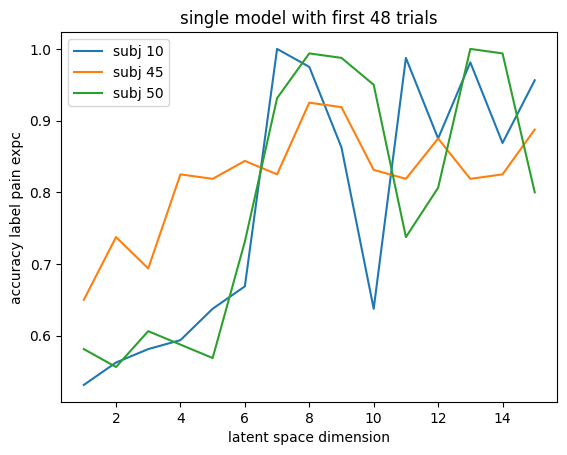

In [97]:
for i in list(['10','45','50']):
    y = df_48[df_48['subj']==i]['acc']
    x = df_48[df_48['subj']==i]['k']
    assert len(x)==len(y)
    plt.plot(x,y)
    plt.legend(['subj 10','subj 45','subj 50'])
    plt.xlabel('latent space dimension')
    plt.ylabel('accuracy label pain expc')
    plt.title('single model with first 48 trials')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

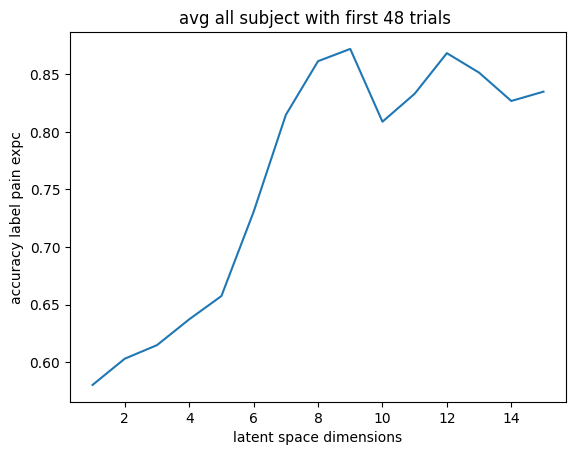

In [98]:
list_y=[]
list_x=[]
for i in list(df_48['k'].unique()):
    list_y.append(df_48[df_48['k']==i]['acc'].mean())
    list_x.append(df_48[df_48['k']==i]['k'].unique())
plt.plot(list_x,list_y)
plt.title('avg all subject with first 48 trials ')
plt.xlabel('latent space dimensions')
plt.ylabel('accuracy label pain expc')
plt.show

# single model 112 trials

In [99]:
inputfile = open('logfile')

In [100]:
df_fewtrials = pd.DataFrame(columns=['subj', 'acc', 'script','k'])

In [101]:
#for i in range(1471): inputfile.readline() # skip first 1470 lines

In [102]:
for i in range(3000):
    line = inputfile.readline()
    if 'hierarchical_all_subjects_less_trials.py' in line:
        if 'Subj num:' in line:
            strline = str(line)
            strline = strline[43:]
            subjnum = str(strline[:strline.find(' ')])
            if(int(subjnum)>9):
                strline = str(strline[strline.find(' ')+2:])
            else:
                strline = str(strline[strline.find(' ')+1:])
            strline = strline[strline.find(':')+2:]
            acc = float(strline[:strline.find(' ')])
            strline = str(strline[strline.find(' ')+1:])
            strline = strline[strline.find(':')+2:]
            script = str(strline[:strline.find(',')])
            strline = str(strline[strline.find(' ')+1:])
            strline = strline[strline.find('dims')+6:]
            k = int(strline[:2])
            newdict = {'subj':subjnum,'acc':acc,'script':script,'k':k}

            df_fewtrials = df_fewtrials.append(newdict,ignore_index=True)


In [103]:
df_fewtrials

,subj,acc,script,k
0,2,0.517857,hierarchical_all_subjects_less_trials.py,1
1,4,0.455357,hierarchical_all_subjects_less_trials.py,1
2,10,0.598214,hierarchical_all_subjects_less_trials.py,1
3,41,0.651786,hierarchical_all_subjects_less_trials.py,1
4,43,0.589286,hierarchical_all_subjects_less_trials.py,1
...,...,...,...,...
250,51,0.714286,hierarchical_all_subjects_less_trials.py,15
251,52,0.714286,hierarchical_all_subjects_less_trials.py,15
252,53,0.803571,hierarchical_all_subjects_less_trials.py,15
253,54,0.794643,hierarchical_all_subjects_less_trials.py,15


In [104]:
subjects_fewtrials = df_fewtrials['subj']
assert len(subjects_fewtrials)/df_fewtrials['k'].max() == len(df_fewtrials['subj'].unique())

In [105]:
list_y_few=[]
list_x_few=[]
for i in list(df_fewtrials['k'].unique()):
    list_y_few.append(df_fewtrials[df_fewtrials['k']==i]['acc'].mean())
    list_x_few.append(df_fewtrials[df_fewtrials['k']==i]['k'].unique())

<function matplotlib.pyplot.show(close=None, block=None)>

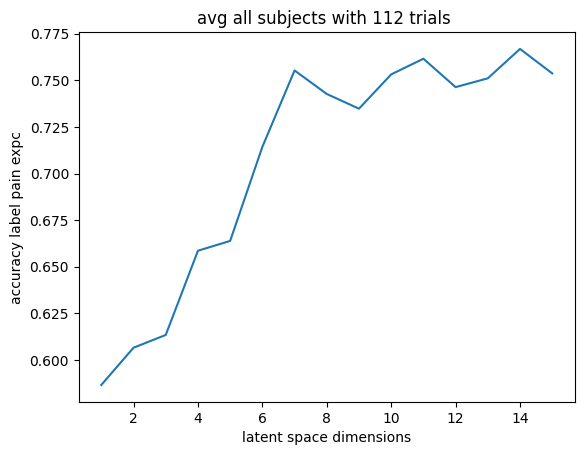

In [106]:
plt.plot(list_x_few,list_y_few)
plt.title('avg all subjects with 112 trials ')
plt.xlabel('latent space dimensions')
plt.ylabel('accuracy label pain expc')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

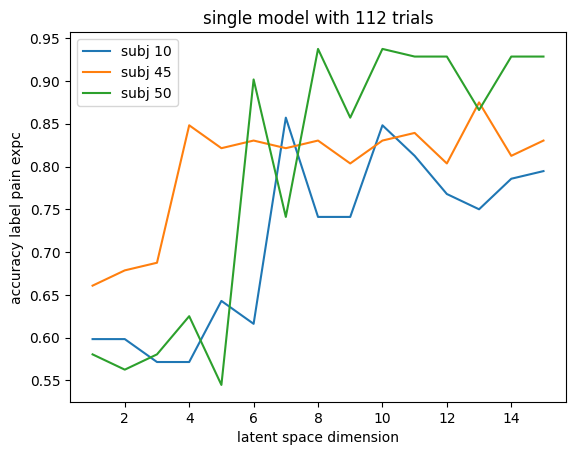

In [107]:
for i in list(['10','45','50']):
    y = df_fewtrials[df_fewtrials['subj']==i]['acc']
    x = df_fewtrials[df_fewtrials['subj']==i]['k']
    assert len(x)==len(y)
    plt.plot(x,y)
    plt.legend(['subj 10','subj 45','subj 50'])
    plt.xlabel('latent space dimension')
    plt.ylabel('accuracy label pain expc')
    plt.title('single model with 112 trials')

plt.show

# confronto 112 160 trials

<function matplotlib.pyplot.show(close=None, block=None)>

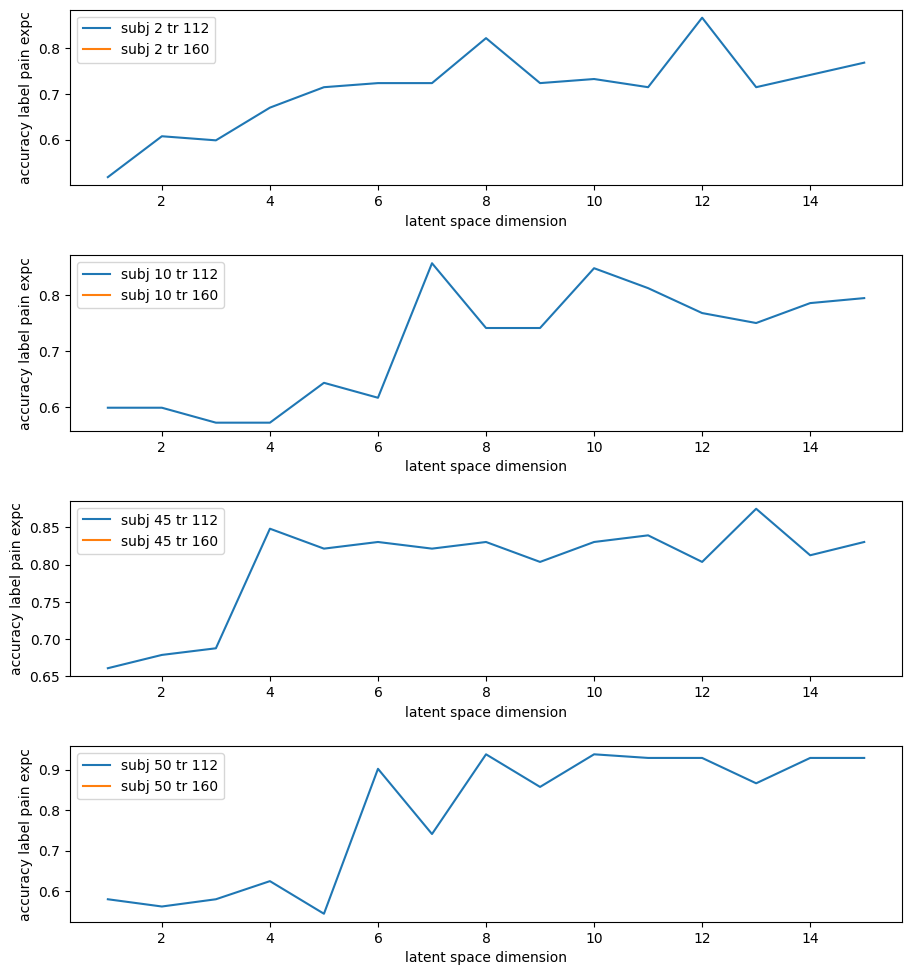

In [108]:
count=0
for i in list(['2','10','45','50']):
    count=count+1
    y_long = df_alltrials[df_alltrials['subj']==i]['acc']
    x_long = df_alltrials[df_alltrials['subj']==i]['k']
    y = df_fewtrials[df_fewtrials['subj']==i]['acc']
    x = df_fewtrials[df_fewtrials['subj']==i]['k']

    assert len(x)==len(y)
    assert len(x_long)==len(y_long)

    plt.subplot(4, 1, count)
    plt.plot(x,y)

    plt.plot(x_long,y_long)
    plt.legend(['subj '+i+' tr 112','subj '+i+' tr 160'])
    plt.xlabel('latent space dimension')
    plt.ylabel('accuracy label pain expc')

plt.subplots_adjust(left=0.1,bottom=0.1,right=1.4,top=2,wspace=0.4,hspace=0.4)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

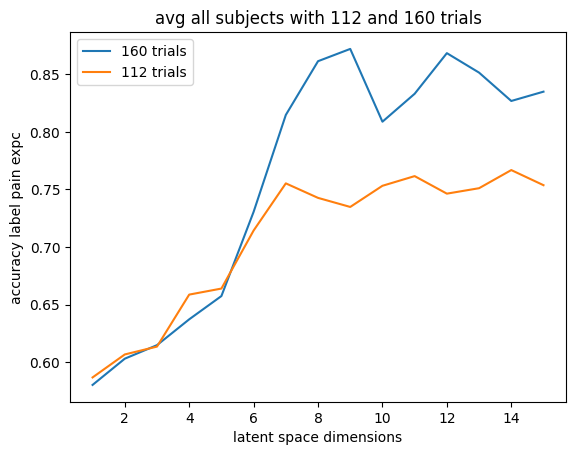

In [109]:
plt.plot(list_x,list_y)
plt.plot(list_x_few,list_y_few)
plt.title('avg all subjects with 112 and 160 trials')
plt.xlabel('latent space dimensions')
plt.ylabel('accuracy label pain expc')
plt.legend(['160 trials','112 trials'])
plt.show

# EDA 112

In [110]:
inputfile = open('logfile_eda')

In [111]:
df_eda = pd.DataFrame(columns=['subj', 'pear', 'conc', 'script','k'])

In [112]:
#for i in range(47): inputfile.readline() # skip first 1470 lines

In [113]:
for i in range(3000):

    line = inputfile.readline()

    if 'hierarchical_all_subjects_less_trials_eda.py' in line:
        if 'Subj num:' in line:
            strline = str(line)

            strline = strline[43:]
            subjnum = str(strline[:strline.find(' ')])
            if(int(subjnum)>9):
                strline = str(strline[strline.find(' ')+2:])
            else:
                strline = str(strline[strline.find(' ')+1:])

            strline = strline[strline.find(':')+2:]
            pear = float(strline[:strline.find(' ')])
            strline = str(strline[strline.find(' ')+1:])

            strline = strline[strline.find(':')+2:]
            conc = float(strline[:strline.find(' ')])
            strline = str(strline[strline.find(' ')+1:])

            strline = strline[strline.find(':')+2:]
            script = str(strline[:strline.find(',')])
            strline = str(strline[strline.find(' ')+1:])

            strline = strline[strline.find('dims')+6:]
            k = int(strline[:2])

            newdict = {'subj':subjnum,'pear':pear,'conc':conc, 'script':script,'k':k}

            df_eda = df_eda.append(newdict,ignore_index=True)


In [114]:
df_eda

,subj,pear,conc,script,k
0,2,0.7911,0.4969,hierarchical_all_subjects_less_trials_eda.py,1
1,4,0.8181,0.5430,hierarchical_all_subjects_less_trials_eda.py,1
2,10,0.7861,0.0919,hierarchical_all_subjects_less_trials_eda.py,1
3,41,0.8280,0.5424,hierarchical_all_subjects_less_trials_eda.py,1
4,43,0.7729,0.3884,hierarchical_all_subjects_less_trials_eda.py,1
...,...,...,...,...,...
250,51,0.8371,0.5724,hierarchical_all_subjects_less_trials_eda.py,15
251,52,0.8327,0.4762,hierarchical_all_subjects_less_trials_eda.py,15
252,53,0.7750,0.4154,hierarchical_all_subjects_less_trials_eda.py,15
253,54,0.9371,0.8425,hierarchical_all_subjects_less_trials_eda.py,15


In [115]:
subjects_eda = df_eda['subj']
assert len(subjects_eda)/df_eda['k'].max() == len(df_eda['subj'].unique())

In [116]:
list_y_conc_eda=[]
list_y_pear_eda = []
list_x_eda=[]
for i in list(df_eda['k'].unique()):
    list_y_pear_eda.append(df_eda[df_eda['k']==i]['pear'].mean())
    list_y_conc_eda.append(df_eda[df_eda['k']==i]['conc'].mean())
    list_x_eda.append(df_eda[df_eda['k']==i]['k'].unique())

<function matplotlib.pyplot.show(close=None, block=None)>

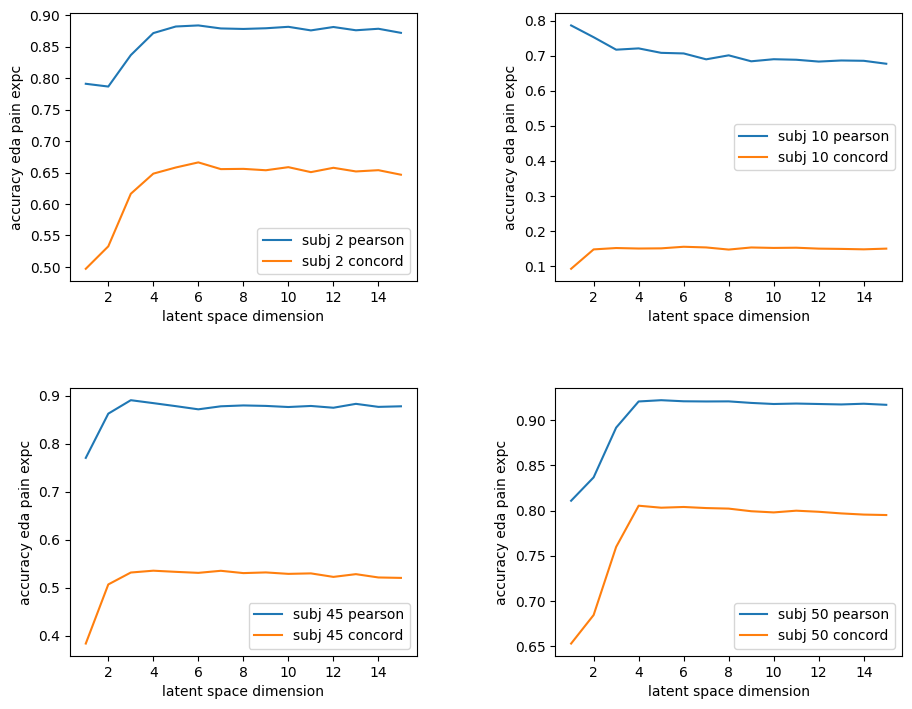

In [117]:
count=0
for i in list(['2','10','45','50']):
    count=count+1
    y_p = df_eda[df_eda['subj']==i]['pear']
    y_c = df_eda[df_eda['subj']==i]['conc']

    x = df_eda[df_eda['subj']==i]['k']
    assert len(x)==len(y)

    plt.subplot(4, 2, count)
    plt.plot(x,y_p)
    plt.plot(x,y_c)
    plt.legend(['subj '+i+' pearson','subj '+i+' concord'])
    plt.xlabel('latent space dimension')
    plt.ylabel('accuracy eda pain expc')

plt.subplots_adjust(left=0.1,bottom=0.1,right=1.4,top=3,wspace=0.4,hspace=0.4)
#plt.subplot_tool()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

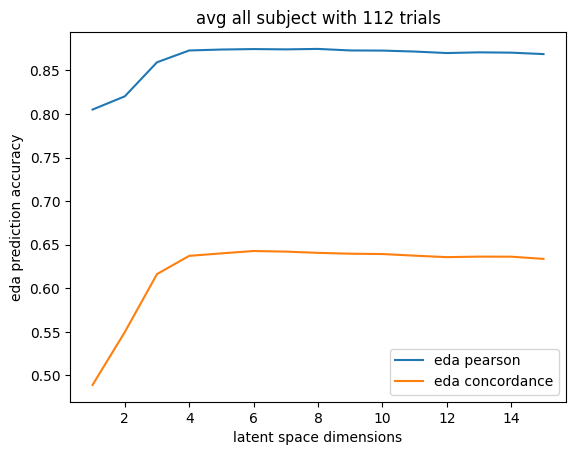

In [118]:
#plt.plot((list_x_few),list_y_few)
plt.plot(list_x_eda,list_y_pear_eda)
plt.plot(list_x_eda,list_y_conc_eda)
plt.title('avg all subject with 112 trials')
plt.xlabel('latent space dimensions')
plt.ylabel('eda prediction accuracy')
plt.legend(['eda pearson','eda concordance'])
plt.show

# eda 160

In [119]:
inputfile = open('logfile_eda_160_trials')

In [120]:
df_eda_long = pd.DataFrame(columns=['subj', 'pear', 'conc', 'script','k'])

In [121]:
#for i in range(47): inputfile.readline() # skip first 1470 lines

In [122]:
for i in range(3000):

    line = inputfile.readline()

    if 'hierarchical_all_subjects_eda.py' in line:
        if 'Subj num:' in line:
            strline = str(line)

            strline = strline[43:]
            #print(strline)
            subjnum = str(strline[:strline.find(' ')])
            if(int(subjnum)>9):
                strline = str(strline[strline.find(' ')+2:])
            else:
                strline = str(strline[strline.find(' ')+1:])

            strline = strline[strline.find(':')+2:]
            pear = float(strline[:strline.find(' ')])
            strline = str(strline[strline.find(' ')+1:])

            strline = strline[strline.find(':')+2:]
            conc = float(strline[:strline.find(' ')])
            strline = str(strline[strline.find(' ')+1:])

            strline = strline[strline.find(':')+2:]
            script = str(strline[:strline.find(',')])
            strline = str(strline[strline.find(' ')+1:])

            strline = strline[strline.find('dims')+6:]
            k = int(strline[:2])

            newdict = {'subj':subjnum,'pear':pear,'conc':conc, 'script':script,'k':k}

            df_eda_long = df_eda_long.append(newdict,ignore_index=True)


In [123]:
df_eda_long[df_eda_long['k']==8]

,subj,pear,conc,script,k
119,2,0.8915,0.6626,hierarchical_all_subjects_eda.py,8
120,4,0.9382,0.8076,hierarchical_all_subjects_eda.py,8
121,10,0.7268,0.1759,hierarchical_all_subjects_eda.py,8
122,41,0.8869,0.6283,hierarchical_all_subjects_eda.py,8
123,43,0.8490,0.4636,hierarchical_all_subjects_eda.py,8
124,44,0.9517,0.8150,hierarchical_all_subjects_eda.py,8
125,45,0.8510,0.4727,hierarchical_all_subjects_eda.py,8
126,46,0.8480,0.6354,hierarchical_all_subjects_eda.py,8
127,47,0.9458,0.7453,hierarchical_all_subjects_eda.py,8
128,48,0.8685,0.4668,hierarchical_all_subjects_eda.py,8


In [124]:
subjects_eda_l = df_eda_long['subj']
assert len(subjects_eda_l)/df_eda_long['k'].max() == len(df_eda_long['subj'].unique())

In [125]:
list_y_conc_eda_l=[]
list_y_pear_eda_l = []
list_x_eda_l=[]
for i in list(df_eda_long['k'].unique()):
    list_y_pear_eda_l.append(df_eda_long[df_eda_long['k']==i]['pear'].mean())
    list_y_conc_eda_l.append(df_eda_long[df_eda_long['k']==i]['conc'].mean())
    list_x_eda_l.append(df_eda_long[df_eda_long['k']==i]['k'].unique())

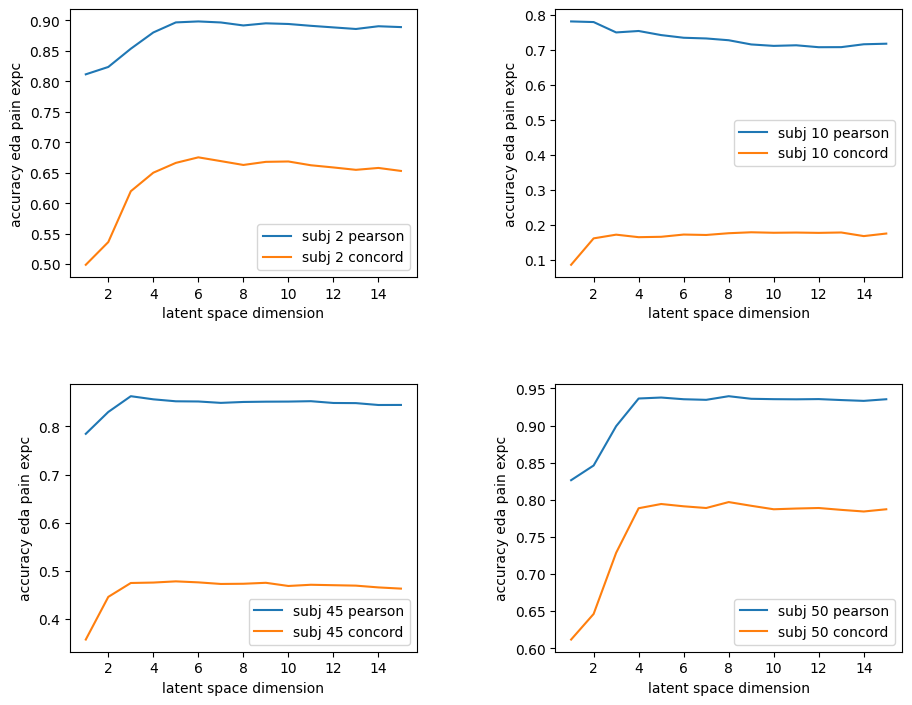

In [126]:
count=0
for i in list(['2','10','45','50']):
    count=count+1
    y_p = df_eda_long[df_eda_long['subj']==i]['pear']
    y_c = df_eda_long[df_eda_long['subj']==i]['conc']

    x = df_eda_long[df_eda_long['subj']==i]['k']
    assert len(x)==len(y_p)

    plt.subplot(4, 2, count)
    plt.plot(x,y_p)
    plt.plot(x,y_c)
    plt.legend(['subj '+i+' pearson','subj '+i+' concord'])
    plt.xlabel('latent space dimension')
    plt.ylabel('accuracy eda pain expc')

plt.subplots_adjust(left=0.1,bottom=0.1,right=1.4,top=3,wspace=0.4,hspace=0.4)
#plt.subplot_tool()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

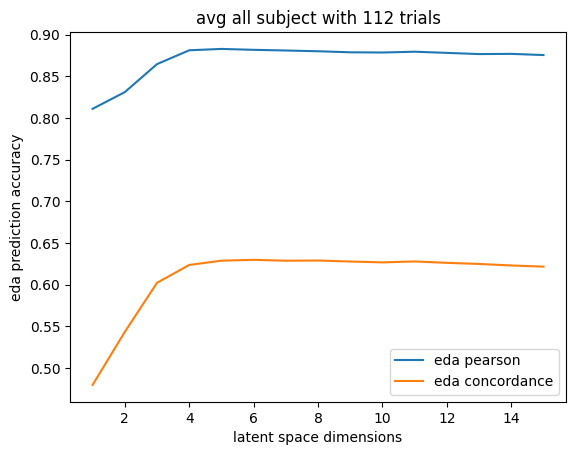

In [127]:
#plt.plot((list_x_few),list_y_few)
plt.plot(list_x_eda_l,list_y_pear_eda_l)
plt.plot(list_x_eda_l,list_y_conc_eda_l)
plt.title('avg all subject with 112 trials')
plt.xlabel('latent space dimensions')
plt.ylabel('eda prediction accuracy')
plt.legend(['eda pearson','eda concordance'])
plt.show

# confronto eda 160 eda 112

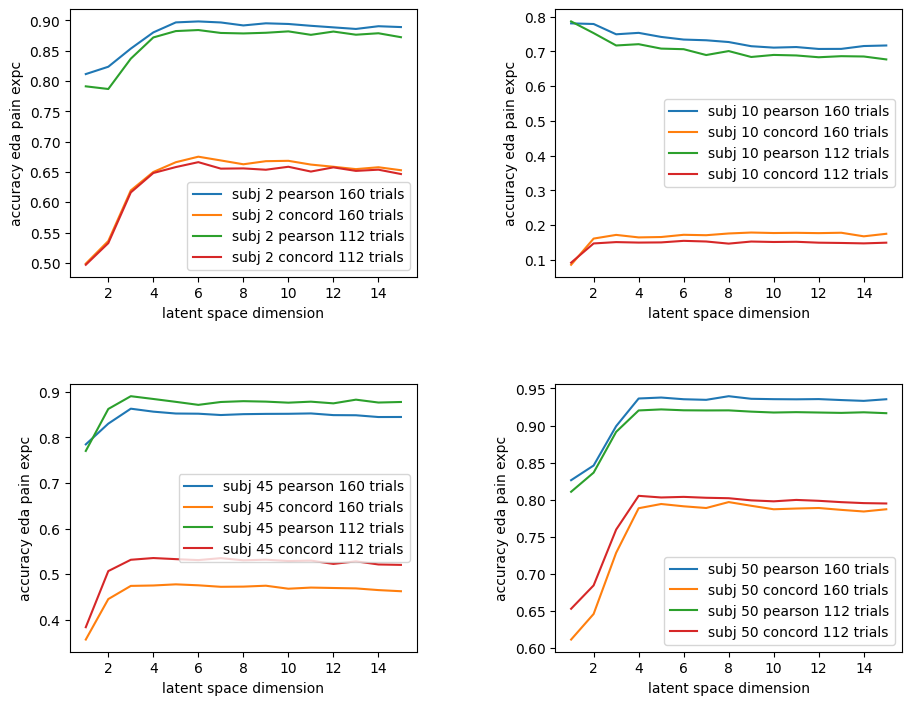

In [128]:
count=0
for i in list(['2','10','45','50']):
    count=count+1

    y_p_l = df_eda_long[df_eda_long['subj']==i]['pear']
    y_c_l = df_eda_long[df_eda_long['subj']==i]['conc']
    x_l = df_eda_long[df_eda_long['subj']==i]['k']

    assert len(x_l)==len(y_p_l)
    assert len(x_l)==len(y_c_l)

    y_p = df_eda[df_eda['subj']==i]['pear']
    y_c = df_eda[df_eda['subj']==i]['conc']
    x = df_eda[df_eda['subj']==i]['k']

    assert len(x)==len(y)

    plt.subplot(4, 2, count)

    plt.plot(x_l,y_p_l)
    plt.plot(x_l,y_c_l)

    plt.plot(x,y_p)
    plt.plot(x,y_c)

    plt.legend(['subj '+i+' pearson 160 trials','subj '+i+' concord 160 trials','subj '+i+' pearson 112 trials','subj '+i+' concord 112 trials'])
    plt.xlabel('latent space dimension')
    plt.ylabel('accuracy eda pain expc')

plt.subplots_adjust(left=0.1,bottom=0.1,right=1.4,top=3,wspace=0.4,hspace=0.4)
#plt.subplot_tool()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

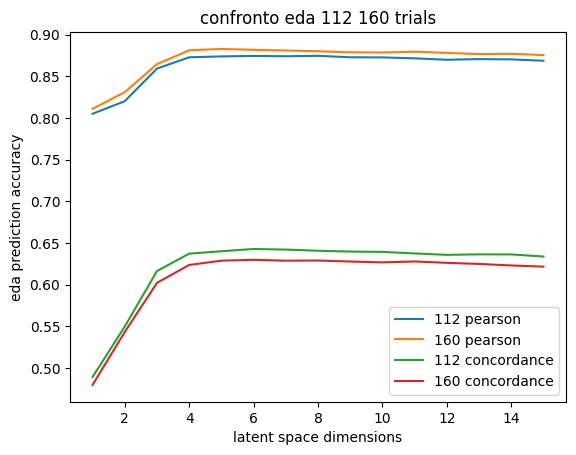

In [129]:
plt.plot(list_x_eda,list_y_pear_eda)
plt.plot(list_x_eda_l,list_y_pear_eda_l)
plt.plot(list_x_eda,list_y_conc_eda)
plt.plot(list_x_eda_l,list_y_conc_eda_l)
plt.title('confronto eda 112 160 trials')
plt.xlabel('latent space dimensions')
plt.ylabel('eda prediction accuracy')
plt.legend(['112 pearson','160 pearson','112 concordance','160 concordance'])
plt.show

# confronto eda pain expectation

## confronto su 160 trials

<function matplotlib.pyplot.show(close=None, block=None)>

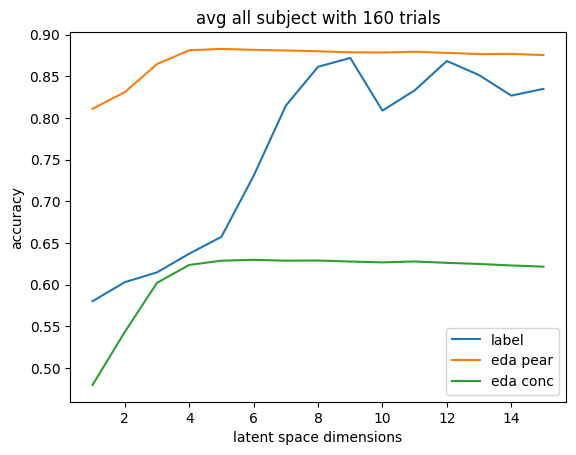

In [130]:
plt.plot(list_x,list_y)
plt.plot(list_x_eda_l,list_y_pear_eda_l)
plt.plot(list_x_eda_l,list_y_conc_eda_l)
plt.title('avg all subject with 160 trials')
plt.xlabel('latent space dimensions')
plt.ylabel('accuracy')
plt.legend(['label','eda pear','eda conc'])
plt.show

## confronto su 112 trials

<function matplotlib.pyplot.show(close=None, block=None)>

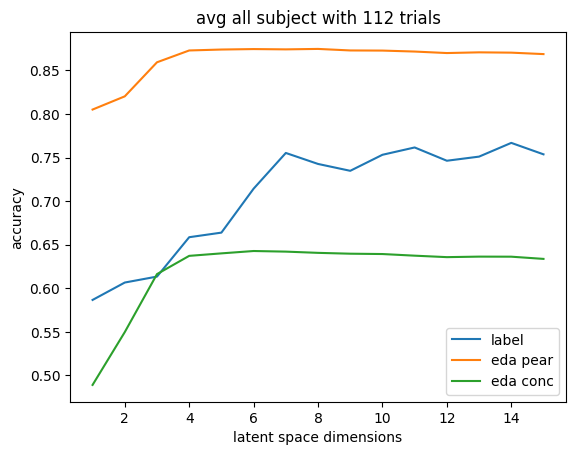

In [131]:
plt.plot((list_x_few),list_y_few)
plt.plot(list_x_eda,list_y_pear_eda)
plt.plot(list_x_eda,list_y_conc_eda)
plt.title('avg all subject with 112 trials')
plt.xlabel('latent space dimensions')
plt.ylabel('accuracy')
plt.legend(['label','eda pear','eda conc'])
plt.show

# pain expectation first 48 trials

In [132]:
inputfile = open('logfile_label_first48trials')

In [133]:
df_label_48 = pd.DataFrame(columns=['subj', 'acc', 'script','k'])

In [134]:
#for i in range(47): inputfile.readline() # skip first 1470 lines

In [135]:
for i in range(3000):

    line = inputfile.readline()

    if 'hierarchical_all_subjects_less_trials.py' in line:
        if 'Subj num:' in line:
            strline = str(line)

            strline = strline[43:]
            #print(strline)
            subjnum = str(strline[:strline.find(' ')])
            if(int(subjnum)>9):
                strline = str(strline[strline.find(' ')+2:])
            else:
                strline = str(strline[strline.find(' ')+1:])
            strline = strline[strline.find(':')+2:]
            acc = float(strline[:strline.find(' ')])
            strline = str(strline[strline.find(' ')+1:])
            strline = strline[strline.find(':')+2:]
            script = str(strline[:strline.find(',')])
            strline = str(strline[strline.find(' ')+1:])
            strline = strline[strline.find('dims')+6:]
            k = int(strline[:2])
            newdict = {'subj':subjnum,'acc':acc,'script':script,'k':k}

            df_label_48 = df_label_48.append(newdict,ignore_index=True)


In [136]:
df_label_48[df_label_48['k']==9]

,subj,acc,script,k
136,2,0.741071,hierarchical_all_subjects_less_trials.py,9


In [137]:
df_label_48 = df_label_48[:-1]

In [138]:
df_label_48

,subj,acc,script,k
0,2,0.464286,hierarchical_all_subjects_less_trials.py,1
1,4,0.526786,hierarchical_all_subjects_less_trials.py,1
2,10,0.535714,hierarchical_all_subjects_less_trials.py,1
3,41,0.625000,hierarchical_all_subjects_less_trials.py,1
4,43,0.580357,hierarchical_all_subjects_less_trials.py,1
...,...,...,...,...
131,51,0.750000,hierarchical_all_subjects_less_trials.py,8
132,52,0.848214,hierarchical_all_subjects_less_trials.py,8
133,53,0.785714,hierarchical_all_subjects_less_trials.py,8
134,54,0.812500,hierarchical_all_subjects_less_trials.py,8


In [139]:
len(subjects_eda_48)/df_label_48['k'].max()

17.0

In [140]:
assert len(subjects_eda_48)/df_label_48['k'].max() == len(df_label_48['subj'].unique())

In [141]:
list_y_acc_48=[]
list_x_eda_48=[]
for i in list(df_label_48['k'].unique()):
    list_y_acc_48.append(df_label_48[df_label_48['k']==i]['acc'].mean())
    list_x_eda_48.append(df_label_48[df_label_48['k']==i]['k'].unique())

<function matplotlib.pyplot.show(close=None, block=None)>

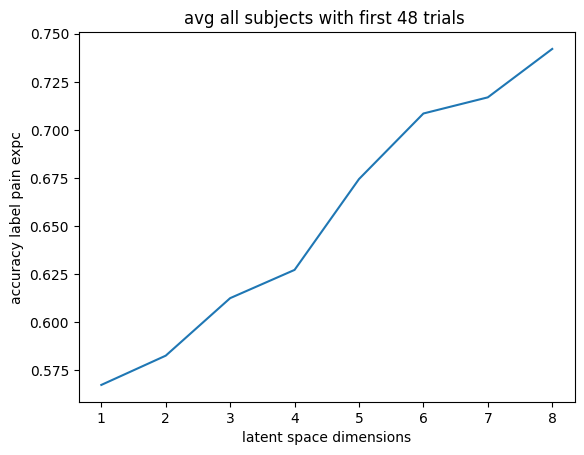

In [142]:
plt.plot(list_x_eda_48,list_y_acc_48)
plt.title('avg all subjects with first 48 trials ')
plt.xlabel('latent space dimensions')
plt.ylabel('accuracy label pain expc')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

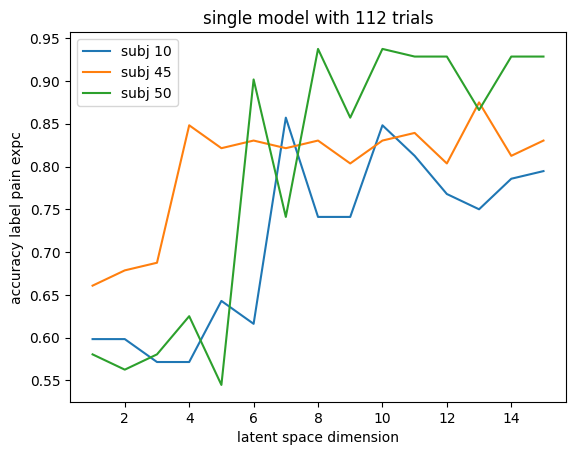

In [143]:
for i in list(['10','45','50']):
    y = df_fewtrials[df_fewtrials['subj']==i]['acc']
    x = df_fewtrials[df_fewtrials['subj']==i]['k']
    assert len(x)==len(y)
    plt.plot(x,y)
    plt.legend(['subj 10','subj 45','subj 50'])
    plt.xlabel('latent space dimension')
    plt.ylabel('accuracy label pain expc')
    plt.title('single model with 112 trials')

plt.show

# confronto label [0-48] [48-160] [0-160]

<function matplotlib.pyplot.show(close=None, block=None)>

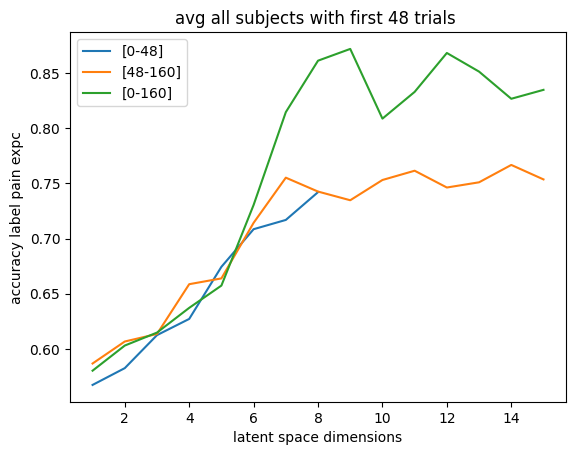

In [144]:
plt.plot(list_x_eda_48, list_y_acc_48)
plt.plot(list_x_few,list_y_few)
plt.plot(list_x,list_y)
plt.legend(['[0-48]','[48-160]','[0-160]'])
plt.title('avg all subjects with different trials')
plt.xlabel('latent space dimensions')
plt.ylabel('accuracy label pain expc')
plt.show

# confronto label [0-12] [0-48] [48-160] [0-160]

<function matplotlib.pyplot.show(close=None, block=None)>

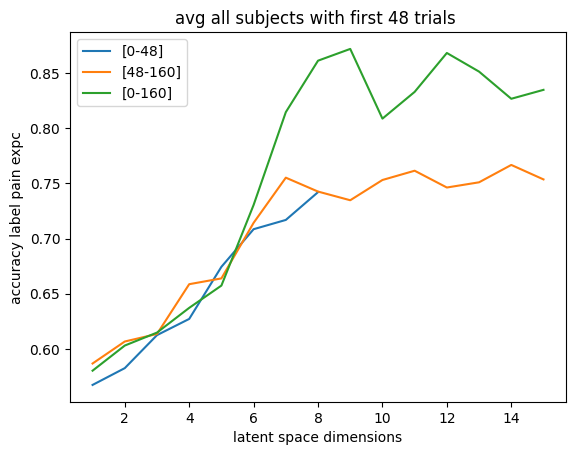

In [144]:
#TODO INSERT 0-12
plt.plot(list_x_eda_48, list_y_acc_48)
plt.plot(list_x_few,list_y_few)
plt.plot(list_x,list_y)
plt.legend(['[0-48]','[48-160]','[0-160]'])
plt.title('avg all subjects with different trials')
plt.xlabel('latent space dimensions')
plt.ylabel('accuracy label pain expc')
plt.show

# eda with 112 trials and no labels

In [152]:
inputfile = open('logfile_eda_nolabel')

In [153]:
df_eda_nolabel = pd.DataFrame(columns=['subj', 'pear', 'conc', 'script','k'])

In [154]:
#for i in range(47): inputfile.readline() # skip first 1470 lines

In [155]:
for i in range(3000):

    line = inputfile.readline()

    if 'hierarchical_all_subjects_less_trials_eda.py' in line:
        if 'Subj num:' in line:
            strline = str(line)

            strline = strline[43:]
            #print(strline)
            subjnum = str(strline[:strline.find(' ')])
            if(int(subjnum)>9):
                strline = str(strline[strline.find(' ')+2:])
            else:
                strline = str(strline[strline.find(' ')+1:])

            strline = strline[strline.find(':')+2:]
            pear = float(strline[:strline.find(' ')])
            strline = str(strline[strline.find(' ')+1:])

            strline = strline[strline.find(':')+2:]
            conc = float(strline[:strline.find(' ')])
            strline = str(strline[strline.find(' ')+1:])

            strline = strline[strline.find(':')+2:]
            script = str(strline[:strline.find(',')])
            strline = str(strline[strline.find(' ')+1:])

            strline = strline[strline.find('dims')+6:]
            k = int(strline[:2])

            newdict = {'subj':subjnum,'pear':pear,'conc':conc, 'script':script,'k':k}

            df_eda_nolabel = df_eda_nolabel.append(newdict,ignore_index=True)


In [162]:
df_eda_nolabel[df_eda_nolabel['k']==2]

,subj,pear,conc,script,k


In [157]:
subjects_eda_nolabel = df_eda_nolabel['subj']

In [164]:
subjects_eda_nolabel = df_eda_nolabel['subj']
assert len(subjects_eda_nolabel)/(df_eda_nolabel['k'].max()-9) == len(df_eda_nolabel['subj'].unique())

In [165]:
list_y_conc_eda_nolabel=[]
list_y_pear_eda_nolabel = []
list_x_eda_nolabel=[]
for i in list(df_eda_nolabel['k'].unique()):
    list_y_pear_eda_nolabel.append(df_eda_nolabel[df_eda_nolabel['k']==i]['pear'].mean())
    list_y_conc_eda_nolabel.append(df_eda_nolabel[df_eda_nolabel['k']==i]['conc'].mean())
    list_x_eda_nolabel.append(df_eda_nolabel[df_eda_nolabel['k']==i]['k'].unique())

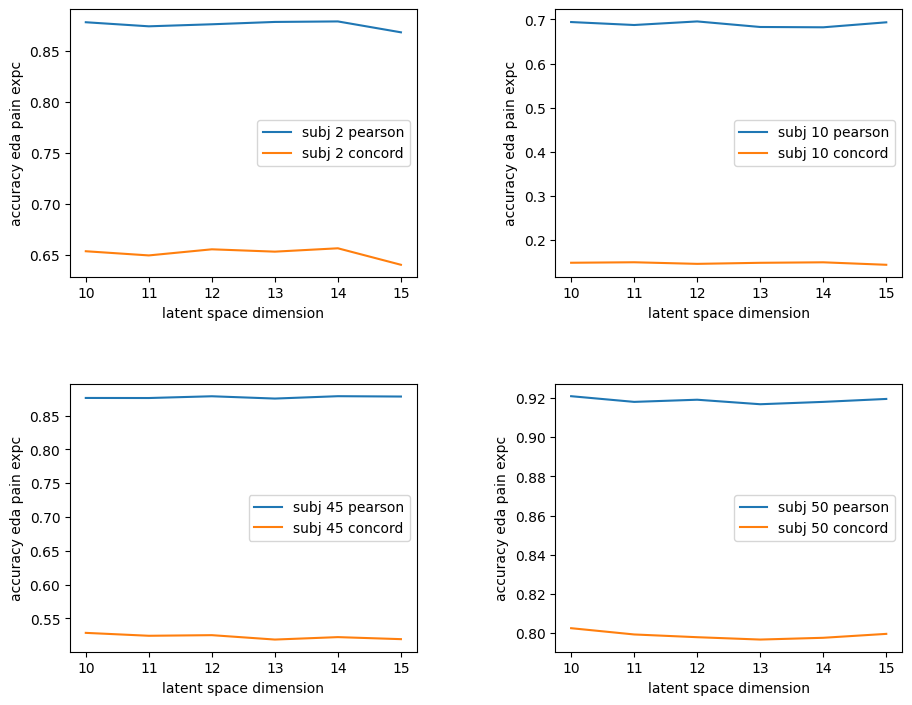

In [166]:
count=0
for i in list(['2','10','45','50']):
    count=count+1
    y_p = df_eda_nolabel[df_eda_nolabel['subj']==i]['pear']
    y_c = df_eda_nolabel[df_eda_nolabel['subj']==i]['conc']

    x = df_eda_nolabel[df_eda_nolabel['subj']==i]['k']
    assert len(x)==len(y_p)

    plt.subplot(4, 2, count)
    plt.plot(x,y_p)
    plt.plot(x,y_c)
    plt.legend(['subj '+i+' pearson','subj '+i+' concord'])
    plt.xlabel('latent space dimension')
    plt.ylabel('accuracy eda pain expc')

plt.subplots_adjust(left=0.1,bottom=0.1,right=1.4,top=3,wspace=0.4,hspace=0.4)
#plt.subplot_tool()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

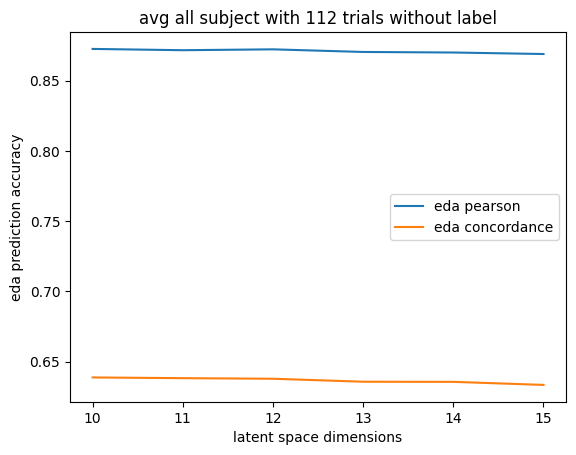

In [168]:
#plt.plot((list_x_few),list_y_few)
plt.plot(list_x_eda_nolabel,list_y_pear_eda_nolabel)
plt.plot(list_x_eda_nolabel,list_y_conc_eda_nolabel)
plt.title('avg all subject with 112 trials without label')
plt.xlabel('latent space dimensions')
plt.ylabel('eda prediction accuracy')
plt.legend(['eda pearson','eda concordance'])
plt.show

# confronto eda 112 with label and without label

<function matplotlib.pyplot.show(close=None, block=None)>

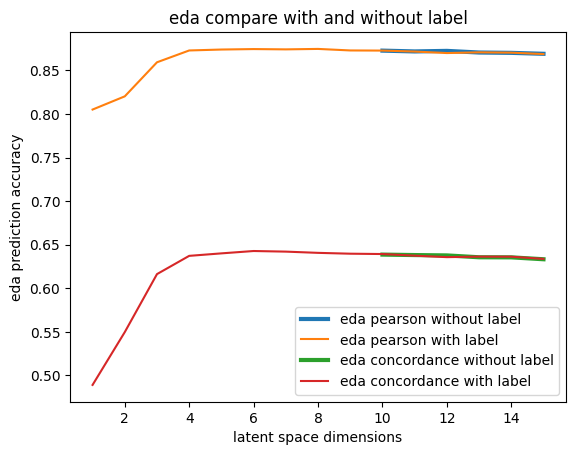

In [174]:
#plt.plot((list_x_few),list_y_few)
plt.plot(list_x_eda_nolabel,list_y_pear_eda_nolabel,linewidth=3)
plt.plot(list_x_eda,list_y_pear_eda)
plt.plot(list_x_eda_nolabel,list_y_conc_eda_nolabel,linewidth=3)
plt.plot(list_x_eda,list_y_conc_eda)
plt.title('eda compare with and without label')
plt.xlabel('latent space dimensions')
plt.ylabel('eda prediction accuracy')
plt.legend(['eda pearson without label','eda pearson with label','eda concordance without label','eda concordance with label'])
plt.show